<a href="https://colab.research.google.com/github/Savitri22/Binary_classification_sklearn/blob/main/Image_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab used bcz for image processing GPU is required

In [2]:
# Dog Vs Cat dataset
# 1. Class 1 =Dog
# 2. Class 2 = Cat

In [6]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2022-03-24 16:13:06--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2022-03-24 16:13:06--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f1d91df21fb194c59e44ee302.dl.dropboxusercontent.com/cd/0/inline/BiGlkZnX-W8lfrQs1j3qbJ_HSAmkcxfHctwZypNrG7EO7PSroR2bj7-PIKdUfItOYpzi2SEbgYTTB9-uAkuzKrb9YnQqtXMd72rvfvo4PTa4QGeMcpwbXWA6xUB8ZTvzU6ykxye-ItvGPw32Opr2ym_wdQPQVvdH1g3AJ5IwUnz87w/file# [following]
--2022-03-24 16:13:06--  https://uc6f1d91df21fb194c59e44ee302.dl.dropboxusercontent.com/cd/0/inline/BiGlkZnX-W8lfrQs1j3qbJ_HSAmkcxfHctwZypNrG7EO7PSroR2bj

In [7]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Visualize Data

Populating the interactive namespace from numpy and matplotlib


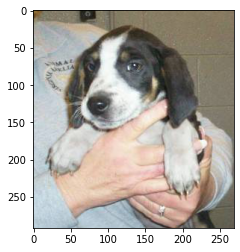

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/training_set/training_set/dogs/dog.10.jpg')
impgplot =plt.imshow(img)
plt.show()

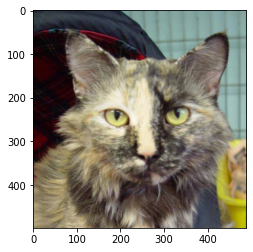

In [12]:
img=mpimg.imread('/content/training_set/training_set/cats/cat.10.jpg')
impgplot =plt.imshow(img)
plt.show()

## Importing Libraries

In [13]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
print(tensorflow.__version__)

2.8.0


## Designing model

###Initialize Parameters

In [19]:
img_width, img_height = 150,150 # width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

### Check shape of image 

In [20]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
      input_shape=(3, img_width, img_height)
else:
      input_shape=(img_width,img_height,3)

### image generator

In [23]:
from tensorflow.python.ops.gen_math_ops import Imag
train_datagen=ImageDataGenerator (rescale=1. /255,shear_range=0.2, horizontal_flip =True)

test_datagen = ImageDataGenerator (rescale=1. /255)


In [26]:

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [25]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 2023 images belonging to 2 classes.


### Visual Representation of ImageDataGenerator

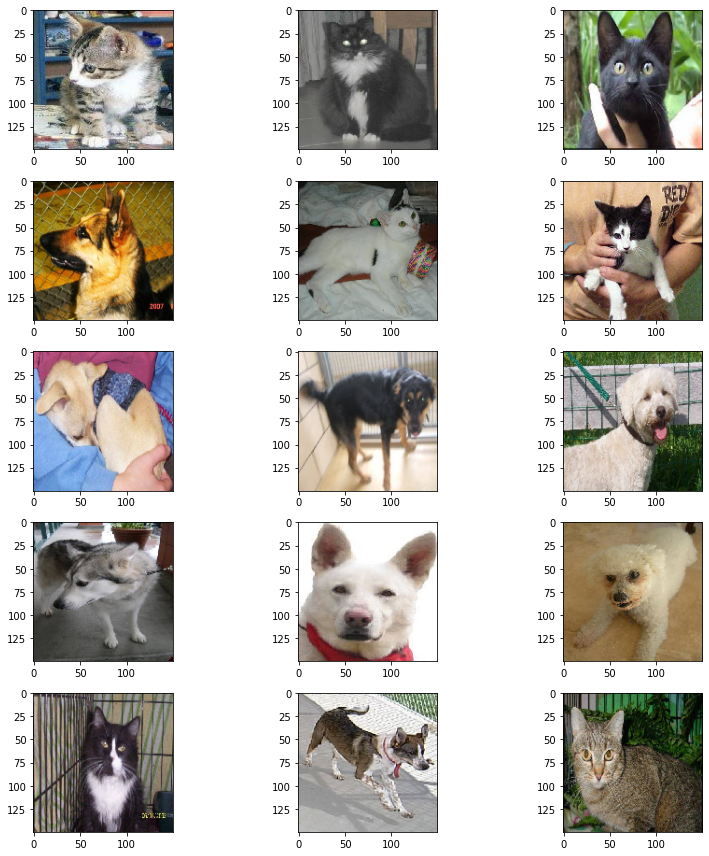

In [29]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5, 3, i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# CNN - 4 Layers

In [32]:
# sequential model # Conv layer
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))  # 64 neurons with 3*3 filters

# MaxPooling model # Relu
model.add(Activation('relu')) # activation- to remove negative pixel from layer
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling2D helps to reduce the size of data

model.add(Flatten()) # Converts multi dimensional array to 1D channel
model.add(Dense(64)) # 64 neurons with 3*3 filter

# Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) # output layer
model.add(Activation('sigmoid')) # sigmoid activation function
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

## Compile the basic CNN model

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
# optimizer optimize model in case data is not right

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

## Fit basic CNN

In [35]:
training = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_sample, epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps = nb_validation_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
100/100 [==============================] - 35s 251ms/step - loss: 1.9002 - accuracy: 0.5622 - val_loss: 0.6357 - val_accuracy: 0.6580
Epoch 2/20
100/100 [==============================] - 24s 239ms/step - loss: 0.6442 - accuracy: 0.6380 - val_loss: 0.6701 - val_accuracy: 0.6310
Epoch 3/20
100/100 [==============================] - 25s 252ms/step - loss: 0.5976 - accuracy: 0.7038 - val_loss: 0.5951 - val_accuracy: 0.6935
Epoch 4/20
100/100 [==============================] - 27s 272ms/step - loss: 0.5740 - accuracy: 0.7239 - val_loss: 0.5885 - val_accuracy: 0.6820
Epoch 5/20
100/100 [==============================] - 31s 314ms/step - loss: 0.5615 - accuracy: 0.7234 - val_loss: 0.6469 - val_accuracy: 0.6740
Epoch 6/20
100/100 [==============================] - 27s 268ms/step - loss: 0.5454 - accuracy: 0.7380 - val_loss: 0.5628 - val_accuracy: 0.7250
Epoch 7/20
100/100 [==============================] - 31s 313ms/step - loss: 0.5037 - accuracy: 0.7728 - val_loss: 0.6082 - val_ac

## Find accuracy score

[0.5622166395187378, 0.6380000114440918, 0.7037783265113831, 0.7239294648170471, 0.7234256863594055, 0.738035261631012, 0.7727959752082825, 0.7739999890327454, 0.7735000252723694, 0.7950000166893005, 0.8055415749549866, 0.8141058087348938, 0.8224999904632568, 0.8364999890327454, 0.8385000228881836, 0.8362720608711243, 0.8575000166893005, 0.8374999761581421, 0.8619999885559082, 0.8675000071525574]


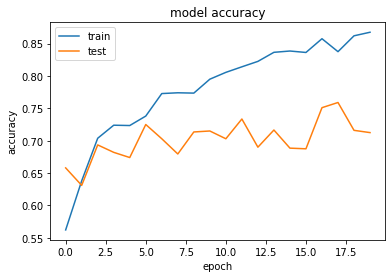

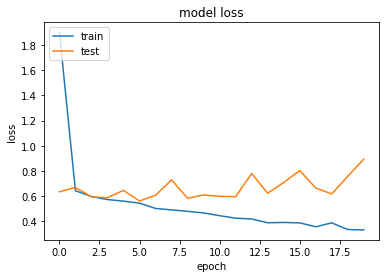

In [36]:
import matplotlib.pyplot as pyplot
%matplotlib inline
# list all data in training
print(training.history['accuracy'])
#summerize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'],loc = 'upper left')
plt.show()
# summerize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'],loc = 'upper left')
plt.show()

## Predict the image

[[1.]]
prediction:  Dog


<function matplotlib.pyplot.show>

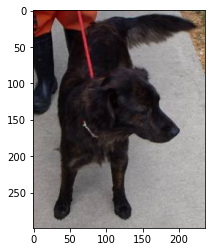

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img('/content/test_set/test_set/dogs/dog.4003.jpg',target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction ='Dog'
else:
  prediction='cat'
print("prediction: ",prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4007.jpg')
imgplot = plt.imshow(img)
plt.show